# Desafio Técnico Data Science A3Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings 

In [4]:
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

## Helper Functions

In [5]:
def teste_proporcoes_Z(df, test_column, target_column, alpha=0.05):
    
    """
    Realiza um teste de proporções Z para avaliar se a proporção em uma coluna de teste
    é estatisticamente diferente em relação a uma coluna alvo.

    Parâmetros:
    - df (pandas.DataFrame): O DataFrame que contém as colunas de interesse.
    - test_column (str): O nome da coluna que contém a proporção a ser avaliada.
    - target_column (str): O nome da coluna alvo que estamos comparando.
    - alpha (float, opcional): O nível de significância do teste (padrão é 0.05).

    Retorna:
    Uma string indicando o resultado do teste de proporções Z.
    """
    
    # Crie uma tabela de contingência entre a coluna de teste e a coluna alvo
    contingency_table = pd.crosstab(df[test_column], df[target_column])
    
    # Calcule as proporções para o alvo = 0 e alvo = 1
    prop_0 = contingency_table.loc[0, 0] / contingency_table.loc[0].sum()
    prop_1 = contingency_table.loc[1, 0] / contingency_table.loc[1].sum()
    
    # Calcule a proporção combinada
    prop_combined = (contingency_table.loc[0, 0] + contingency_table.loc[1, 0]) / df.shape[0]
    
    # Calcule a estatística Z
    z_stat = (prop_0 - prop_1) / (prop_combined * (1 - prop_combined) * (1 / contingency_table.loc[0].sum() + 1 / contingency_table.loc[1].sum()))**0.5
    
    # Calcule o valor-p
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    
    # Verifique se o valor-p é menor que o nível de significância (alpha)
    if p_value < alpha:
        return print(f"P-value {round(p_value, 4)} < {alpha}. Há evidência estatística de diferença nas proporções para essa característica em relação ao churn.")
    else:
        return print(f"P-value {round(p_value, 4)} > {alpha}. Não há evidência estatística de diferença nas proporções para essa característica em relação ao churn")

In [6]:
def teste_mannwhitney(df, column, target_column, alpha=0.05):
    """
    Realiza um teste de Mann-Whitney para comparar as distribuições 
    de uma coluna em relação a uma coluna alvo.

    Parâmetros:
    - df (pandas.DataFrame): O DataFrame que contém as colunas de interesse.
    - column (str): O nome da coluna cujas distribuições serão comparadas.
    - target_column (str): O nome da coluna alvo que estamos comparando.
    - alpha (float, opcional): O nível de significância do teste (padrão é 0.05).

    Retorna:
    Uma string indicando o resultado do teste de Mann-Whitney U.

    Exemplo de uso:
    result = mann_whitney_u_test(df_desafio, 'tenure', 'Churn')
    print(result)
    """
    # Separe os dados da coluna para a coluna alvo = 0 e coluna alvo = 1
    data_0 = df[df[target_column] == 0][column]
    data_1 = df[df[target_column] == 1][column]

    # Realize o teste de Mann-Whitney U
    statistic, p_value = mannwhitneyu(data_0, data_1, alternative='two-sided')

    # Verifique se o valor-p é menor que o nível de significância
    if p_value < alpha:
        return f"P-value {round(p_value, 4)} < {alpha}. Há evidência estatística de diferença nas distribuições de '{column}' em relação a '{target_column}'."
    else:
        return f"P-value {round(p_value, 4)}  < {alpha}. Não há evidência estatística de diferença nas distribuições de '{column}' em relação a '{target_column}'."

## Read data

In [7]:
df_desafio = pd.read_csv('Customer-Churn - Customer-Churn.csv')

In [8]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

- Não há a presença de valores no dataset
- Todas as colunas apresentam a mesma volumetria para cada campo

In [9]:
df_desafio.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


- Corrigindo colunas numéricas

In [10]:
df_desafio['tenure'] = df_desafio['tenure'].astype(float)

In [11]:
df_desafio['MonthlyCharges'] = df_desafio['MonthlyCharges'].str.replace(',', '.').astype(float)

In [12]:
df_desafio['TotalCharges'] = df_desafio['TotalCharges'].str.replace(',', '.').astype(float)

- Criando flags para Serviço internet (independente do tipo)

In [13]:
df_desafio['flag_InternetService'] = df_desafio['InternetService'].apply(lambda x: 0 if x=='No' else 1)

## Análise Exploratória

- Verificar balanceamento da base

Aproximadamente 73% da base não apresenta churn, contra 27% marcados com essa flag

In [14]:
(df_desafio.Churn.value_counts(normalize=True)*100).round(2)

No     73.46
Yes    26.54
Name: Churn, dtype: float64

- Verificar se existe duplicidade de registros por customer ID

In [15]:
df_desafio.customerID.nunique()

7043

### Visualização distribuições de variáveis categóricas

A partir dos gráficos gerados abaixo, visualmente é possível tirar alguns insights e algumas features podem ter algum indicativo de churn como:
1. Senior Citizen
2. Internet Service
3. Online Security
4. Online Security
5. Online Backup
6. Device Protection
7. Tech Support
8. Streaming TV/Movies
9. Contract
10. Payment Method

É valido perceber que os clientes que possuem Serviço de internet Fibra ótica possuem um churn maior em geral, do que os clientes que não tem algum pacote contratado e contratação DSL. Esse pode ser um indicativo para melhoria no produto de internet.

Além disso, formas de pagamentos e modelo de contrato parecem se relacionar bastante com churn, de forma que o método de pagamento por Eletronic Check e contrato mensal elevam bastante os níveis de churn dos clientes.

In [16]:
list_categoricals = df_desafio.columns.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'flag_InternetService'])

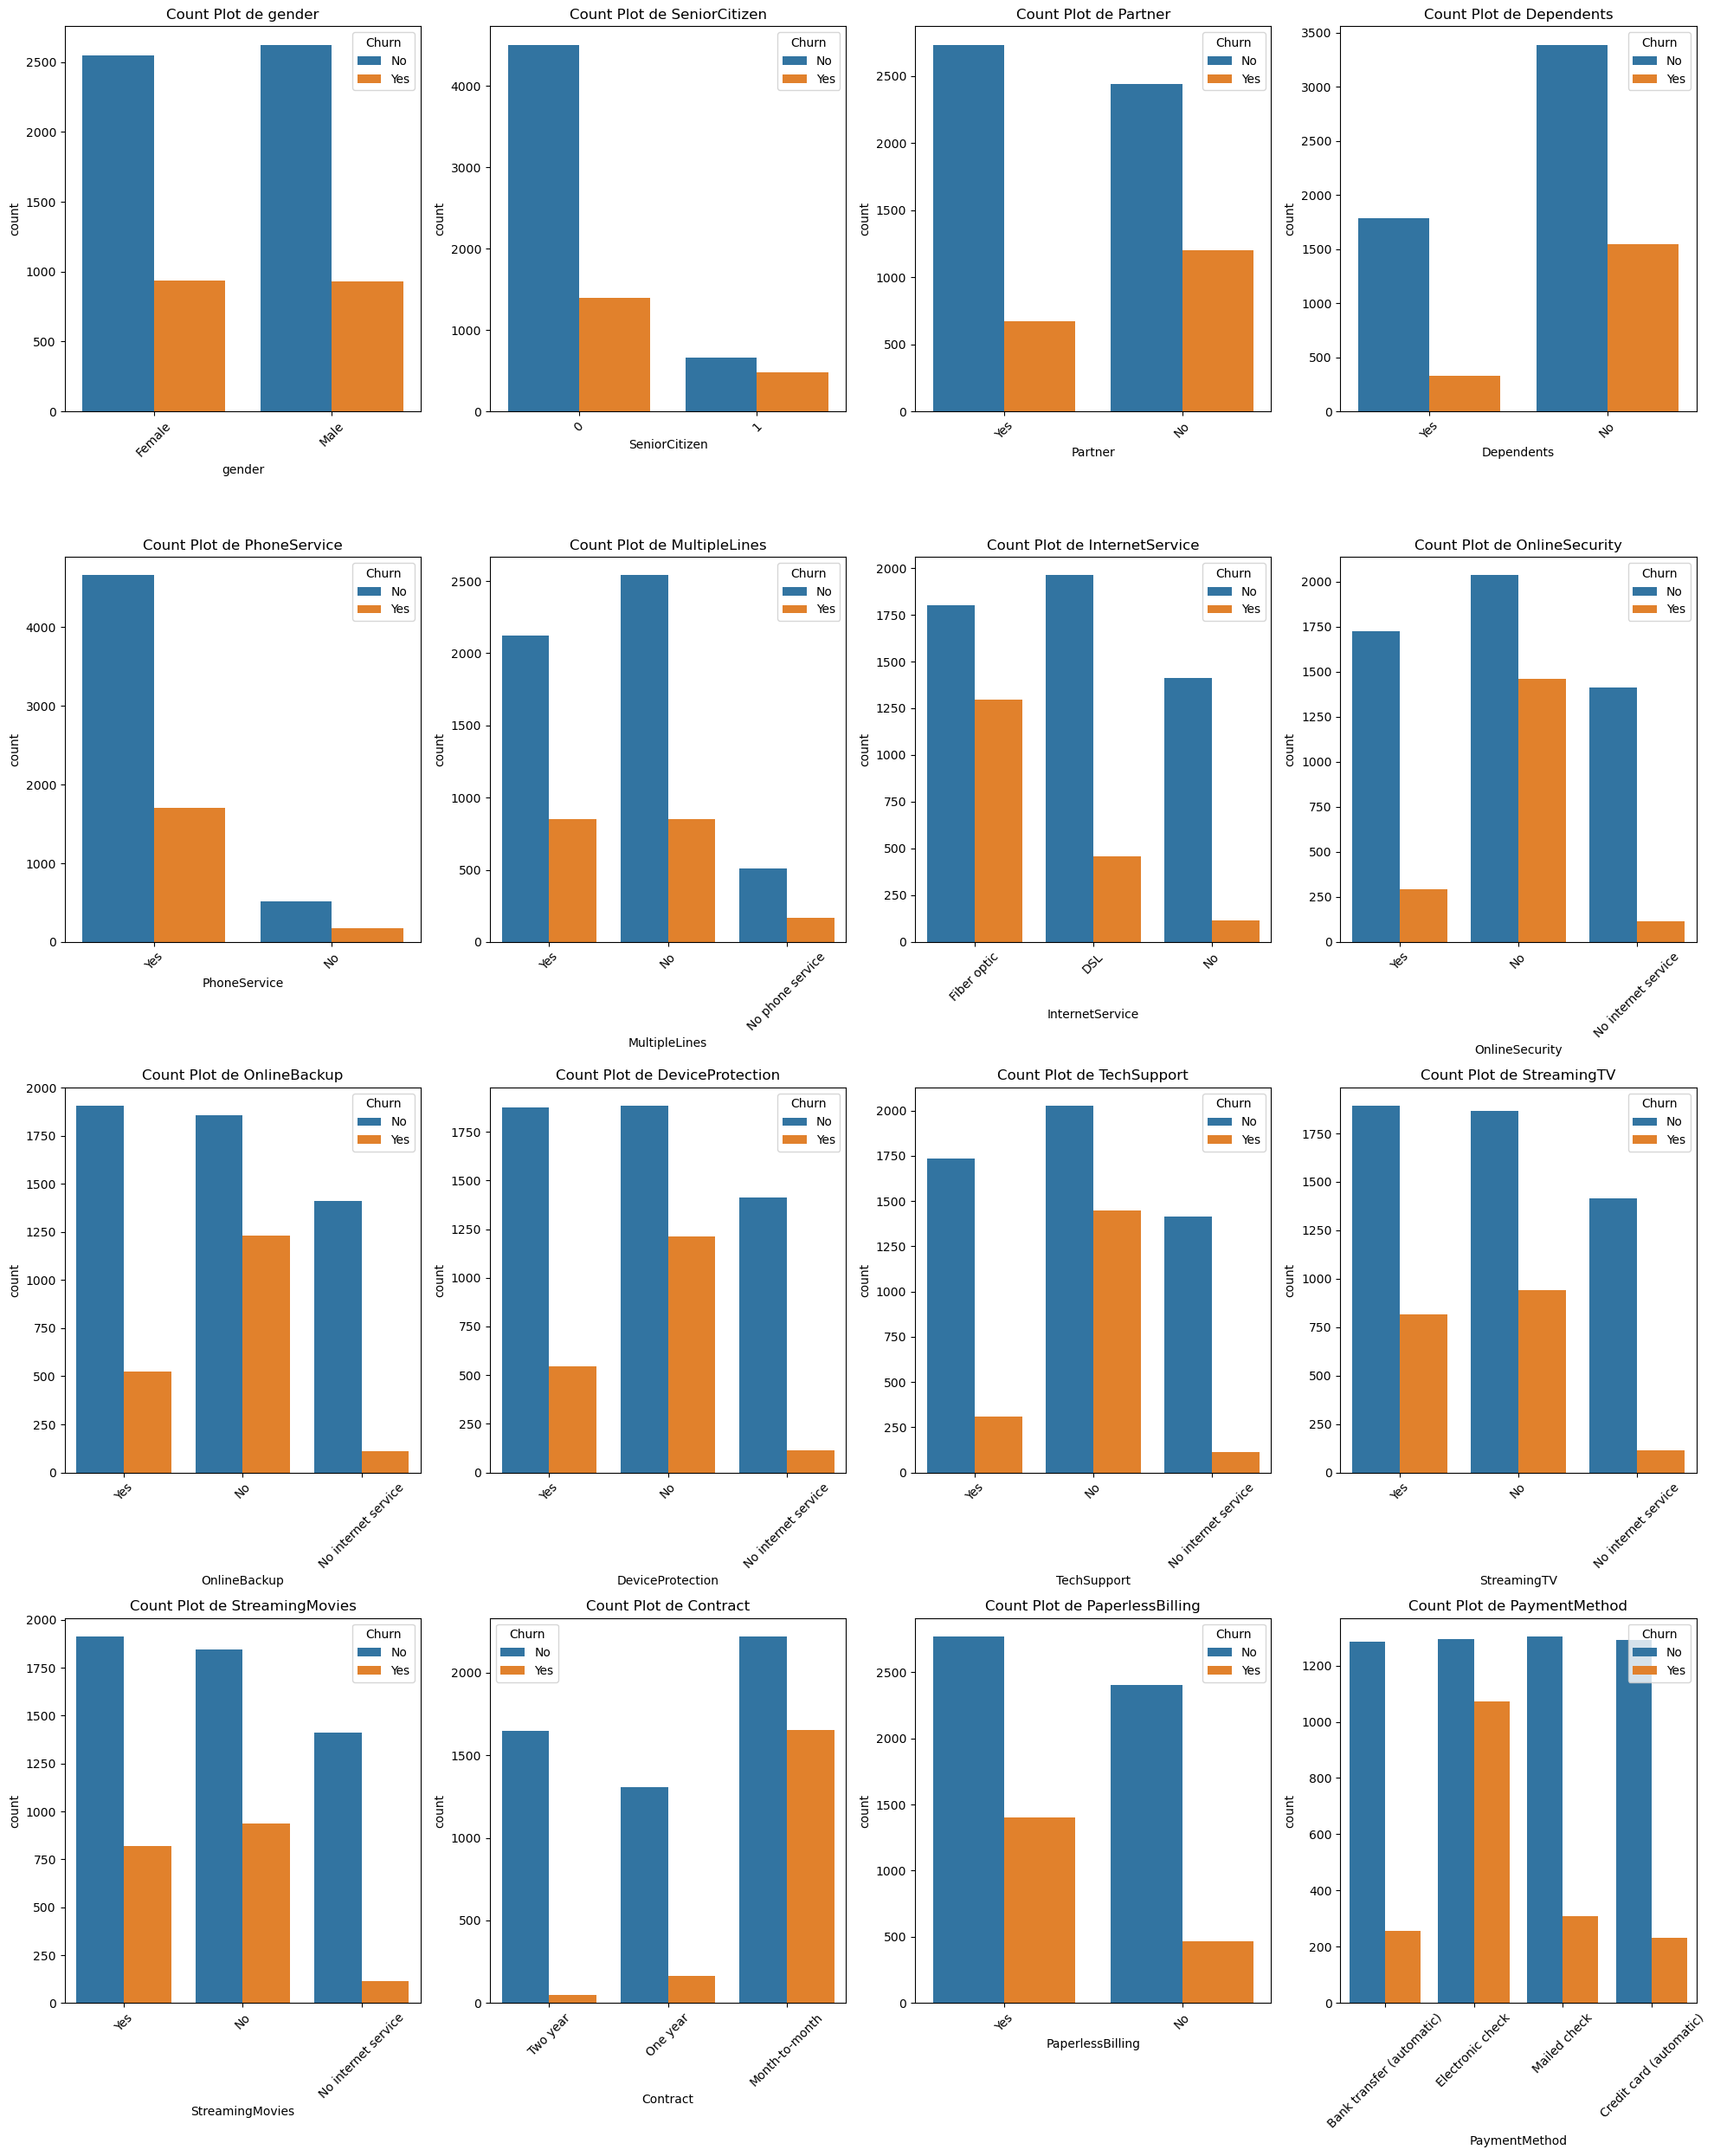

In [17]:
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))

for i, column in enumerate(list_categoricals):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(data=df_desafio, x=column, ax=ax, hue='Churn')
    ax.set_title(f'Count Plot de {column}')
    ax.tick_params(axis='x', labelrotation=45)
    
plt.tight_layout()
plt.show()

- Avaliando Volume de Churn para clientes marcados como Senior. 

É possível perceber um grande volume nesse caso, com quase 42% dos clientes sendo churn. Com o auxílio do boxplot, é possível criar a **hipótese de que um dos motivos para a maior volumetria de churn em clientes Senior está associado ao alto valor dos custos mensais**. Ao comparar os custos mensais de clientes não senior e senior, vemos que não só a mediana do grupo Senior é mais elevada como também o 1º quartil é mais próximo à mediana.

In [18]:
# Total de clientes Churn em Senior
df_desafio[df_desafio['SeniorCitizen']==1]['Churn'].value_counts(normalize=True)*100

No     58.318739
Yes    41.681261
Name: Churn, dtype: float64

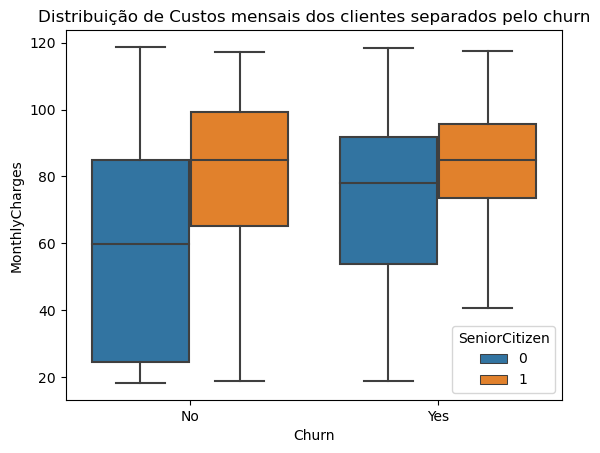

In [19]:
ax = sns.boxplot(df_desafio, y='MonthlyCharges', x='Churn', hue='SeniorCitizen', showfliers=False)
ax.set(title='Distribuição de Custos mensais dos clientes separados pelo churn');

Como algumas das variações que apresentam indícios de churn fazem parte de quebras associadas somente à clientes que tem algum Serviço de internet, será avaliada a distribuição considerando esse filtro.

- Ao olhar os subprodutos de internet como **Segurança Online** e **Device Protection**, vemos que o churn dos  clientes é menor quando alguns produtos extras são contratados também, com exceção de serviços de Streaming (Visualmente). Um possível ponto de melhoria aqui pode ser direcionar os clientes à internet DSL e oferecer os subprodutos também.

In [20]:
evaluate_intert_service = df_desafio[df_desafio['flag_InternetService'] == 1]

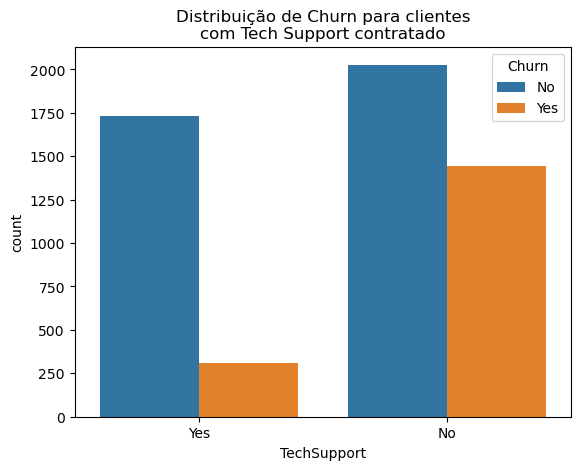

In [21]:
ax = sns.countplot(data=evaluate_intert_service, x='TechSupport', hue='Churn')
ax.set(title='Distribuição de Churn para clientes\ncom Tech Support contratado');

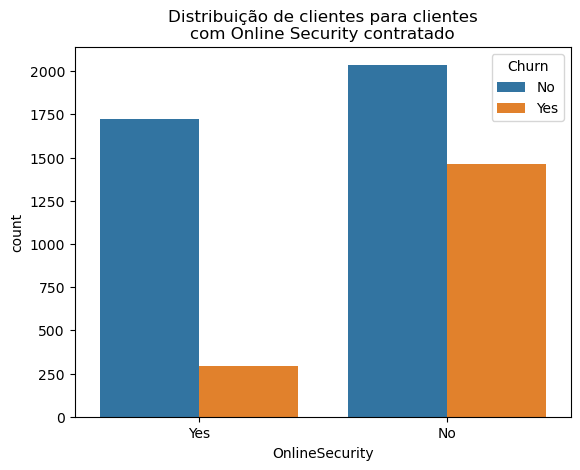

In [22]:
ax = sns.countplot(data=evaluate_intert_service, x='OnlineSecurity', hue='Churn')
ax.set(title='Distribuição de clientes para clientes\ncom Online Security contratado');

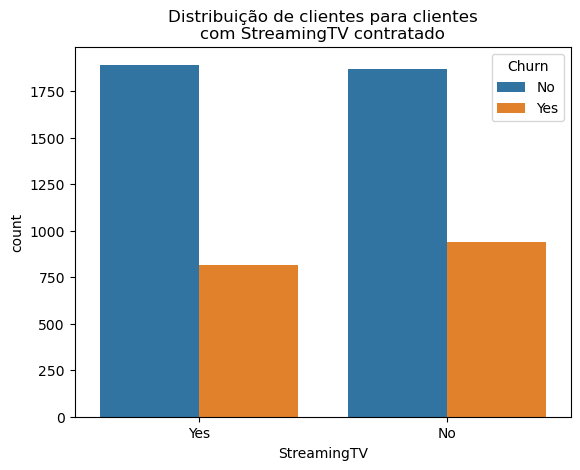

In [23]:
ax = sns.countplot(data=evaluate_intert_service, x='StreamingTV', hue='Churn')
ax.set(title='Distribuição de clientes para clientes\ncom StreamingTV contratado');

### Análise de variáveis contínuas

- Ao observar o churn em relação ao *Tenure* e *Monthly Charges*, parece haver visualmente uma diferença clara entre as distribuições dos clietes quando relacionado ao churn. Visualmente falando, valores de Tenure mais baixos estão associados à um churn maior. Já para custos mensais é possível perceber que existe uma diferença em que clientes com valores de custos mensais mais elevados estão mais propensos ao churn.

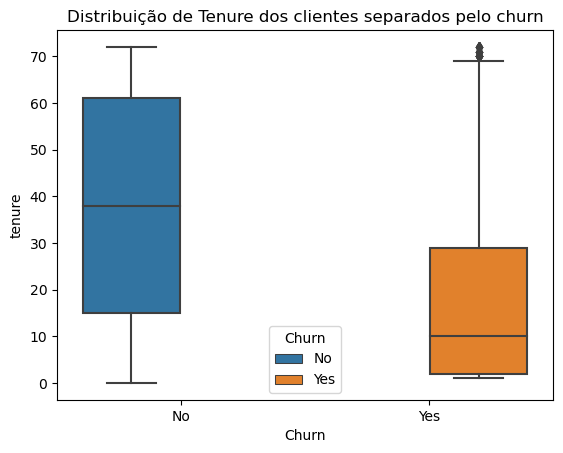

In [24]:
ax = sns.boxplot(df_desafio, y='tenure', x='Churn', hue='Churn')
ax.set(title='Distribuição de Tenure dos clientes separados pelo churn');

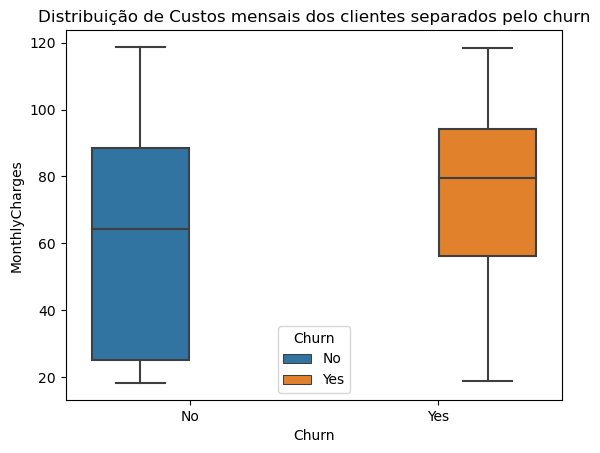

In [25]:
ax = sns.boxplot(df_desafio, y='MonthlyCharges', x='Churn', hue='Churn')
ax.set(title='Distribuição de Custos mensais dos clientes separados pelo churn');

### Teste de Proporções Z e Mann-whitney
A fim de validar estatisticamente se de fato existe diferença estatística entre as distribuições de algumas das features levantadas e complementar a análise gráfica realizada anteriormente, serão aplicados os teste de proporções Z e teste de MannWhitney. O Teste de proporções Z para variáveis categoricas e Mann-Whitney em distribuições contínuas.

- Hipótese Nula (**p-value > alpha**): As proporções dos dois grupos são iguais; <br>
- Hipótese Alternativa (**p-value < alpha**): As proporções dos dois grupos são diferentes;

In [26]:
df_desafio['Churn'] = df_desafio['Churn'].map({'Yes': 1, 'No': 0})

In [27]:
evaluate_intert_service['Churn'] = evaluate_intert_service['Churn'].map({'Yes': 1, 'No': 0})

- Teste de proporções Z

1. É possível concluir estatisticamente que não parece haver influência do serviço de telefone no churn dos clientes (algo que era visualmente difícil de concluir)
2. Para uso de Paperless Billing, existe uma característica estatisticamente relacionada ao churn
3. Em relação aos subprodutos da internet contrata, é possível validar também que o Suporte técnico está de fato associado ao churn (com clientes menos propensos ao churn quando contratam o suporte). Além disso, os serviços de streaming que visualmente não pareciam apresentar relação, estatisticamente possuem relação de com churn, em que clientes que possuem Streaming estão menos associados ao churn.
4. Quanto à clientes marcados como Senior, é possível perceber que o volume de churn para esse grupo é estatísticamente maior.

In [28]:
df_desafio['PhoneService'] = df_desafio['PhoneService'].map({'Yes': 1, 'No': 0})

In [29]:
teste_proporcoes_Z(df_desafio, 'PhoneService', 'Churn')

P-value 0.3162 > 0.05. Não há evidência estatística de diferença nas proporções para essa característica em relação ao churn


In [30]:
df_desafio['PaperlessBilling'] = df_desafio['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [31]:
teste_proporcoes_Z(df_desafio, 'PaperlessBilling', 'Churn')

P-value 0.0 < 0.05. Há evidência estatística de diferença nas proporções para essa característica em relação ao churn.


In [32]:
evaluate_intert_service['TechSupport'] = evaluate_intert_service['TechSupport'].map({'Yes': 1, 'No': 0})

In [33]:
teste_proporcoes_Z(evaluate_intert_service, 'TechSupport', 'Churn')

P-value 0.0 < 0.05. Há evidência estatística de diferença nas proporções para essa característica em relação ao churn.


In [34]:
evaluate_intert_service['StreamingTV'] = evaluate_intert_service['StreamingTV'].map({'Yes': 1, 'No': 0})

In [35]:
teste_proporcoes_Z(evaluate_intert_service, 'StreamingTV', 'Churn')

P-value 0.0059 < 0.05. Há evidência estatística de diferença nas proporções para essa característica em relação ao churn.


In [36]:
evaluate_intert_service['StreamingMovies'] = evaluate_intert_service['StreamingMovies'].map({'Yes': 1, 'No': 0})

In [37]:
teste_proporcoes_Z(evaluate_intert_service, 'StreamingMovies', 'Churn')

P-value 0.0029 < 0.05. Há evidência estatística de diferença nas proporções para essa característica em relação ao churn.


- Teste de mannwhitney 

Em relação as variáveis contínuas, foi possível validar as hipóteses levantadas a partir da análise gráfica.
1. Existe diferença estatística relevante entre as distribuições de tenure para clientes Churn e Não-churn - clientes churn possuem valores menores dessa característica.
2. Para Custos mensais também foi evidenciada diferença estatistica, dessa vez inversa ao tenure - custos mais altos estão associados ao churn.

In [38]:
teste_mannwhitney(df_desafio, 'tenure', 'Churn')

"P-value 0.0 < 0.05. Há evidência estatística de diferença nas distribuições de 'tenure' em relação a 'Churn'."

In [39]:
teste_mannwhitney(df_desafio, 'MonthlyCharges', 'Churn')

"P-value 0.0 < 0.05. Há evidência estatística de diferença nas distribuições de 'MonthlyCharges' em relação a 'Churn'."

## Conclusão

Nesta conclusão, observamos que a análise exploratória dos dados permitiu identificar insights relevantes para aprimorar o produto. Foi notado que os clientes com serviço de internet de fibra ótica apresentam um nível de churn geralmente maior do que os clientes que não têm nenhum pacote contratado ou que optam pela conexão DSL. Esse achado sugere que **há espaço para melhorias no produto de internet, particularmente em relação à qualidade e estabilidade da conexão de fibra ótica.**

Além disso, a forma de pagamento e o modelo de contrato mostraram ter uma forte relação com o churn. Os clientes que optam pelo método de pagamento por Eletronic Check e contrato mensal tendem a apresentar níveis mais elevados de churn. Nesse caso, uma estratégia eficaz seria **investir em programas de fidelização e oferecer contratos mais longos**, como de 1 ou 2 anos, que já aprensentam melhores resultados em relação ao churn. Com a perspectiva de um tempo de contrato mais longo, é possível **oferecer descontos progressivos e serviços adicionais gratuitos que podem motivar o cliente a se comprometerem por um período mais longo**. 

Seguindo a linha de produtos adicionais, foi evidenciado que a contratação de subprodutos de internet, como Segurança Online, Device Protection e Tech Support, parece estar associada a níveis mais baixos de churn, sugerindo que a oferta de serviços complementares pode ser uma estratégia eficaz para reduzir o churn.

Por fim, observou-se que custos mensais elevados também estão relacionados a um maior churn dos clientes. Portanto, **considerar estratégias de preços mais competitivas ou a oferta de pacotes com melhor custo-benefício** pode ser uma abordagem valiosa para reduzir o churn e melhorar a satisfação do cliente. Estes insights podem orientar as próximas etapas para aprimorar o produto e reter mais clientes no mercado.

### Próximos Passos

1. Avaliar a Natureza dos Problemas com a Internet de Fibra Ótica:
conduzir uma análise mais aprofundada para determinar se os problemas com a internet de fibra ótica são regionais ou representam um desafio geral para a empresa. Isso pode envolver a coleta de dados geográficos e o monitoramento dos locais onde os problemas são mais prevalentes.

2. Desenvolver Modelo Preditivo de Churn Condicionado a Otimização de desconto:
É possível construir um modelo que pode calcular o desconto ótimo na mensalidade que minimiza a probabilidade de churn e, ao mesmo tempo, maximiza a receita da empresa.